In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
print(df.head())
print(df.info())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

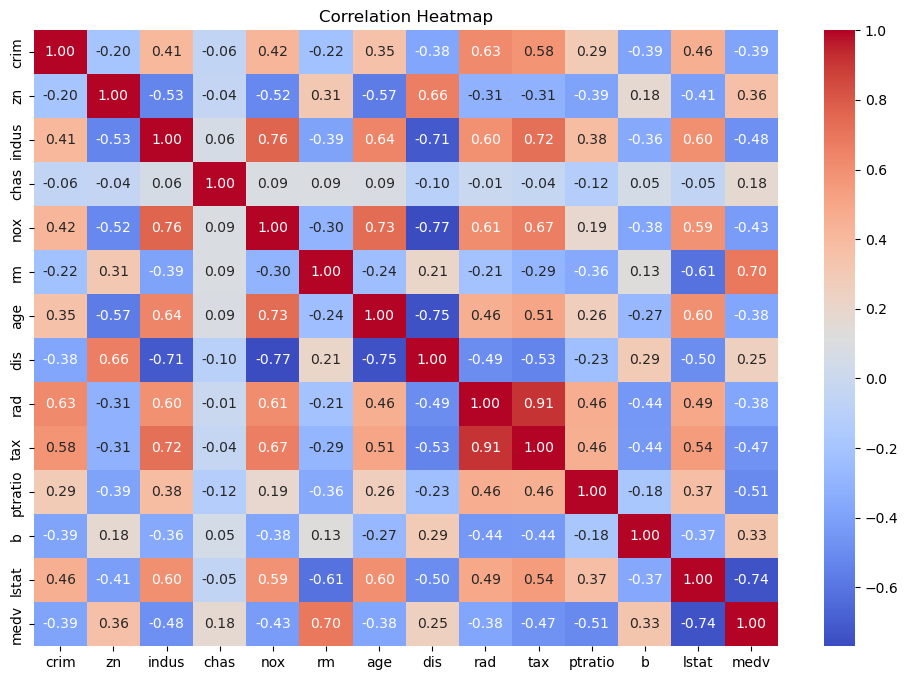

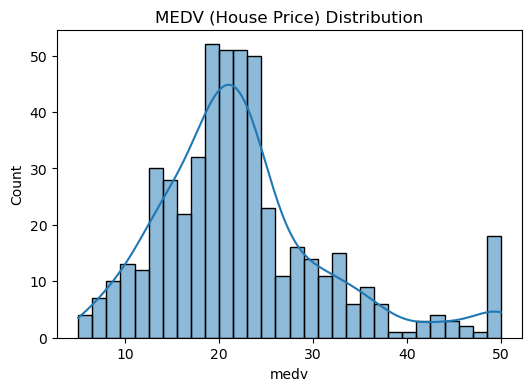

In [8]:
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['medv'], bins=30, kde=True)
plt.title("MEDV (House Price) Distribution")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("medv", axis=1)
y = df["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lin_reg = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1, max_iter=10000)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)


lin_reg.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic.fit(X_train_scaled, y_train)

lin_preds = lin_reg.predict(X_test_scaled)
ridge_preds = ridge.predict(X_test_scaled)
lasso_preds = lasso.predict(X_test_scaled)
elastic_preds = elastic.predict(X_test_scaled)

models = {
    "Linear Regression": lin_preds,
    "Ridge": ridge_preds,
    "Lasso": lasso_preds,
    "Elastic Net": elastic_preds
}

for name, preds in models.items():
    print(f"{name} → MSE: {mean_squared_error(y_test, preds):.2f} | "
          f"MAE: {mean_absolute_error(y_test, preds):.2f} | "
          f"R²: {r2_score(y_test, preds):.4f}")


Linear Regression → MSE: 24.29 | MAE: 3.19 | R²: 0.6688
Ridge → MSE: 24.31 | MAE: 3.19 | R²: 0.6685
Lasso → MSE: 25.66 | MAE: 3.24 | R²: 0.6501
Elastic Net → MSE: 25.20 | MAE: 3.19 | R²: 0.6563


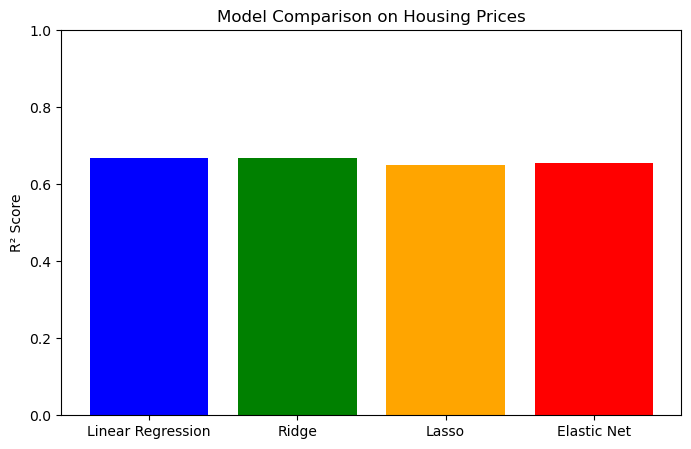

In [12]:
import matplotlib.pyplot as plt
import numpy as np

r2_scores = {
    "Linear Regression": r2_score(y_test, lin_preds),
    "Ridge": r2_score(y_test, ridge_preds),
    "Lasso": r2_score(y_test, lasso_preds),
    "Elastic Net": r2_score(y_test, elastic_preds)
}

plt.figure(figsize=(8, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'orange', 'red'])
plt.ylabel("R² Score")
plt.title("Model Comparison on Housing Prices")
plt.ylim(0, 1)
plt.show()
